# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
from sklearn.ensemble._hist_gradient_boosting import predictor
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the limit for the number fo displayed column
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

#Library to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
df_main = pd.read_csv('Loan_Modelling.csv')

In [4]:
data = df_main.copy()

## Data Overview

### View the first and last 5 rows of the dataset

In [5]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [6]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [7]:
data.shape

(5000, 14)

In [8]:
data['ID'].nunique()

5000

* ID column is unique, this means we have data for 5000 unique bank customers
* We have 14 columns

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking for missing values

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* We do not have any missing data from any colum

### Dropping the duplicate values

In [11]:
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [12]:
data = data.drop(["ID"], axis=1)
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


### Statistical summary of the data

**Check for dataset anomalies.**

In [13]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

* Since Experience is in years, we cannot have negative values. (We are assuming this is a typo from the data entry)
* Sop we convert those to the positive value.

In [14]:
data[data["Experience"] < 0 ]["Experience"].unique()

array([-1, -2, -3])

In [15]:
data.loc[data["Experience"] == -1 , "Experience"] = 1
data.loc[data["Experience"] == -2 , "Experience"] = 2
data.loc[data["Experience"] == -3 , "Experience"] = 3

data[data["Experience"] < 0 ]["Experience"].unique()

array([], dtype=int64)

### Fix categorical columns

In [16]:
# Convert Education column to categorical value
data["Education"].unique()

array([1, 2, 3])

In [17]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]


Number of unique values if we take first two digits of ZIPCode:  7


In [18]:
# Convert datatype to category for categorical columns
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]

data[cat_cols] = data[cat_cols].astype("category")
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91,4,1.00000,2,0,0,0,0,0,1


In [19]:
data["ZIPCode"].unique()

['91', '90', '94', '92', '93', '95', '96']
Categories (7, object): ['90', '91', '92', '93', '94', '95', '96']

**Let's check the statistical summary of the data.**

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.13460,11.41519,0.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000


* The `income` ranges from 8 thousand to 224 thousand
* The `family` count ranges from 1 to 4

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**The below functions need to be defined to carry out the EDA.**

In [21]:
def histogram_boxplot(df, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Univariate Analysis

#### Observations on Age

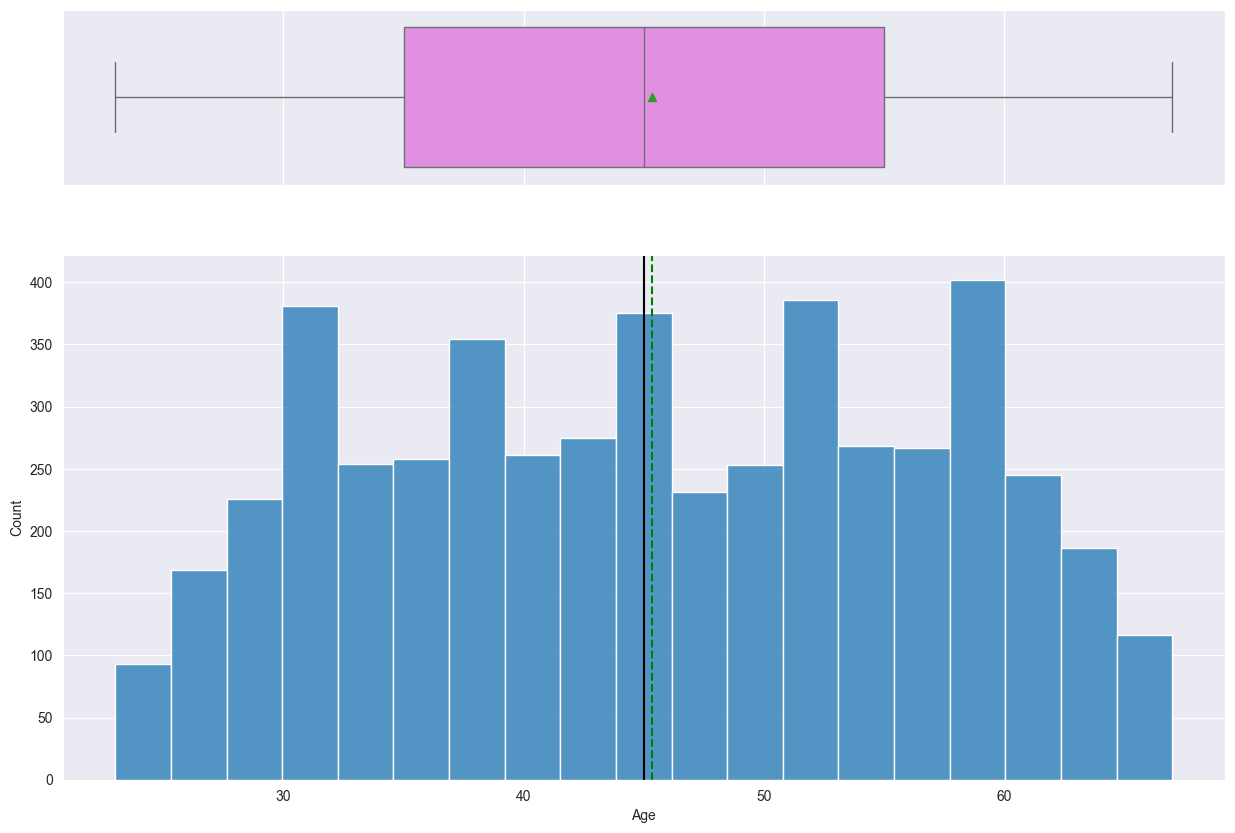

In [23]:
histogram_boxplot(data, 'Age')

* The `Age` distribution looks slightly skewed to the left with a mean Age of 45
* No outlier is detected

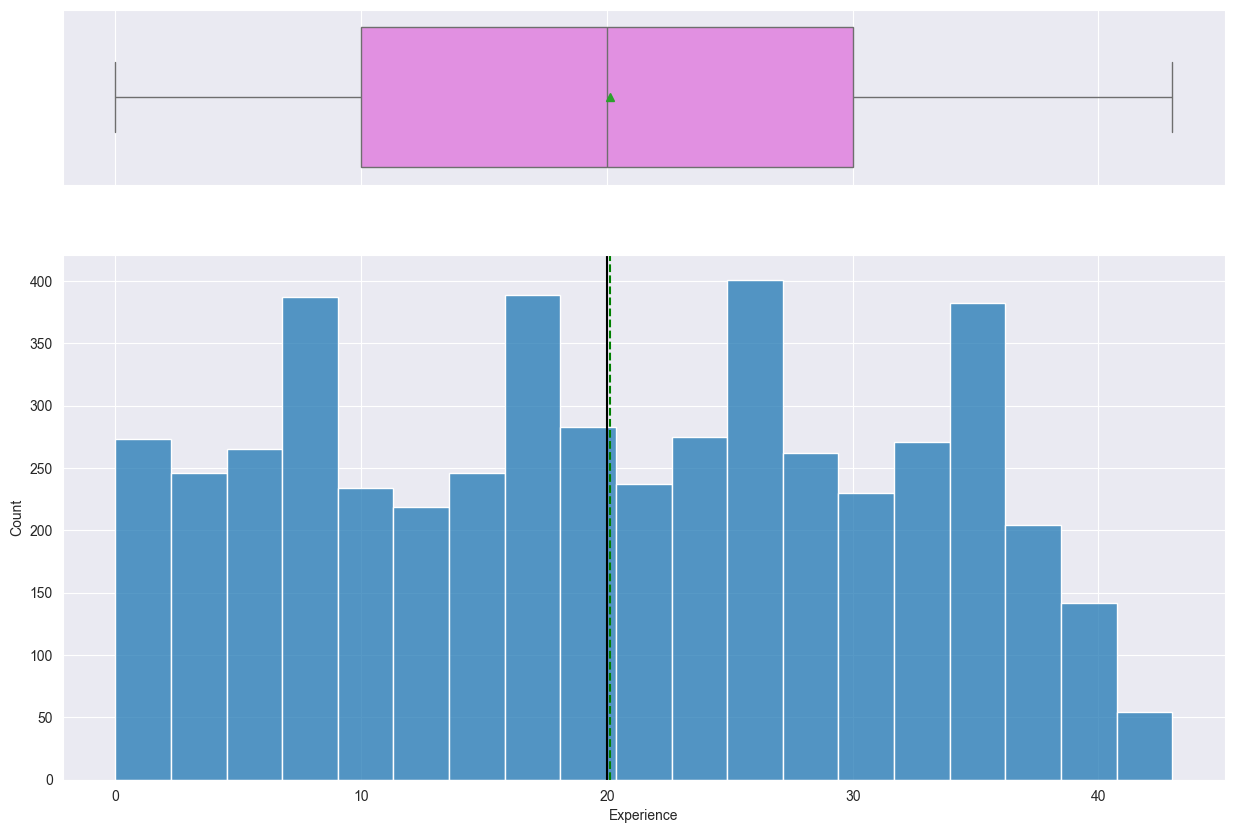

In [24]:
histogram_boxplot(data, 'Experience')

* The `Experience` distribution looks slightly skewed to the right with a mean Experience of 20
* No outlier is detected

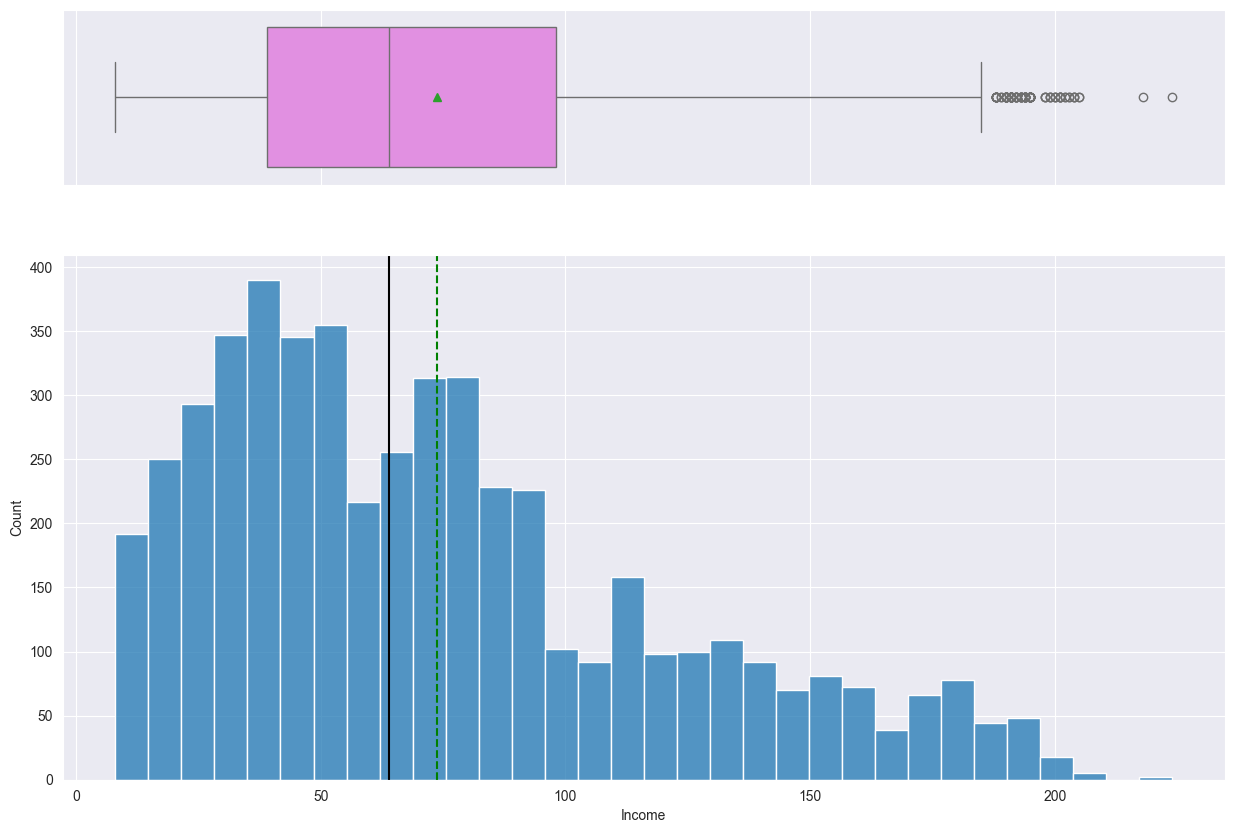

In [25]:
histogram_boxplot(data, 'Income')

* The `Income` distribution is skewed to the right, with a mean income of 64 thousand
* Outliers are present on the upper quartile

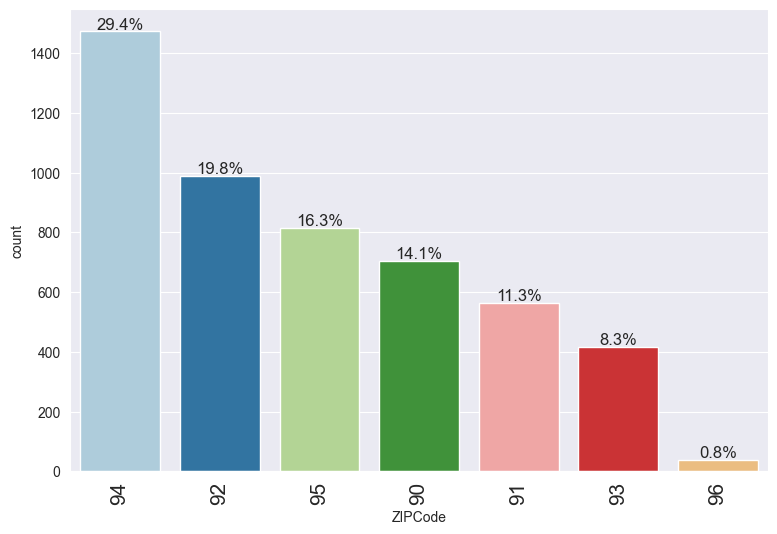

In [26]:
labeled_barplot(data,'ZIPCode', True)

* 26% of Customers are from 94 area Zipcode
* 0.8% are from the 96 area zipcode

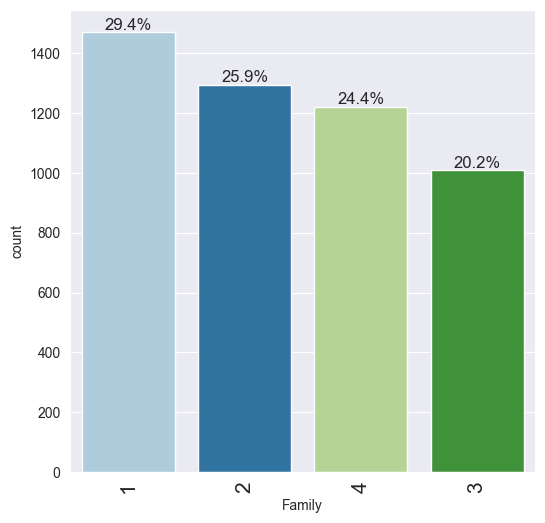

In [27]:
labeled_barplot(data, 'Family', True)

* We can see here that 29.4% of the customers are single people without a family
* While the remaining 70% have a family size from 2 - 4 people

#### Observation on CCAvg

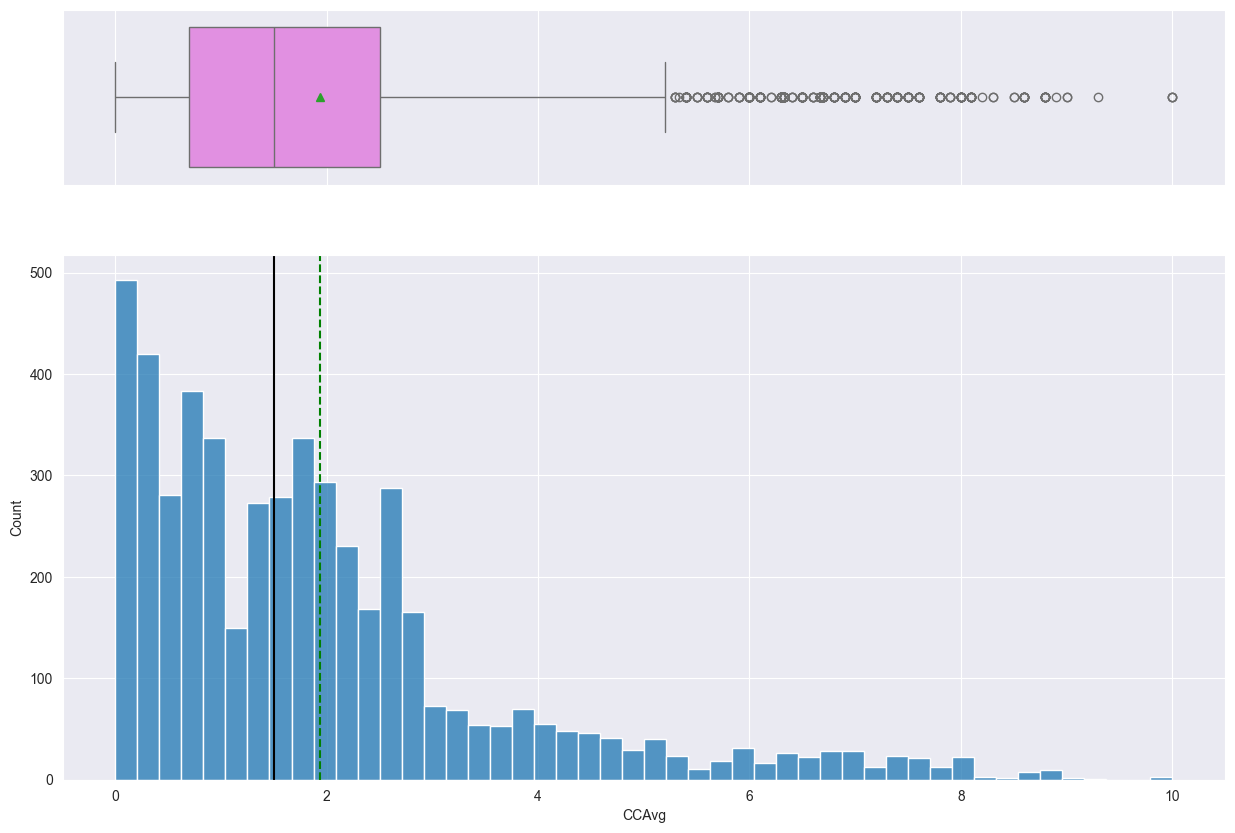

In [28]:
histogram_boxplot(data, 'CCAvg')

* The distribution is skewed to the right
* Outliers are present in the upper quartile

#### Observation on Education

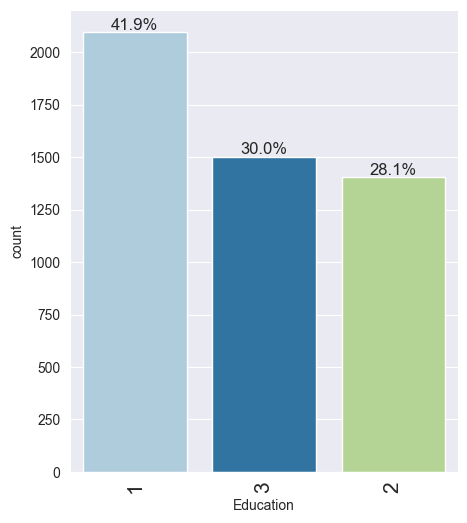

In [29]:
labeled_barplot(data, 'Education', True)

* We have 41.9% Undergrad, 30.0% Graduates and 29.1% Advanced 

#### Observation on Mortgage

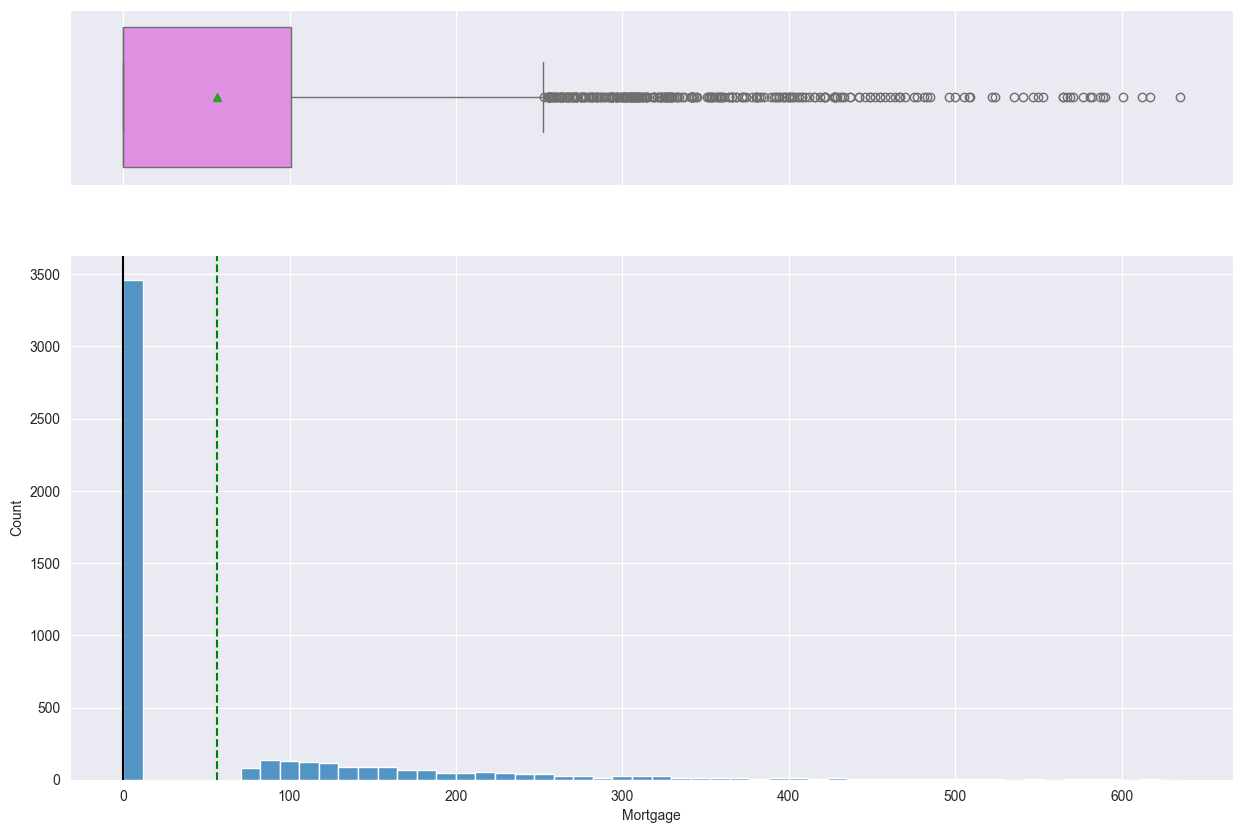

In [30]:
histogram_boxplot(data, "Mortgage")

* Almost 3500 people have a mortgage value of 0, with a mean of 0
* Outliers are very heavy on the upper quartile
* The column will most likely be dropped

#### Observation on Personal Loans

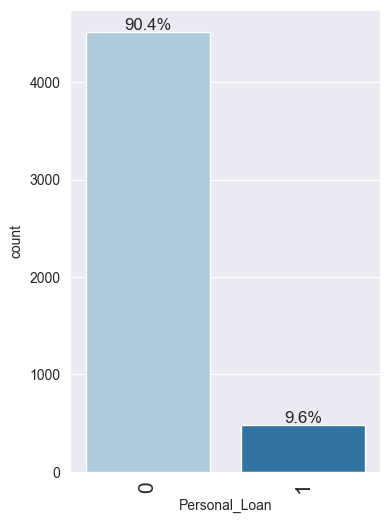

In [31]:
labeled_barplot(data, 'Personal_Loan', True)

* 90.4% Do not have personal loan, while 9.6% have personal loan

#### Observation on Securities Account

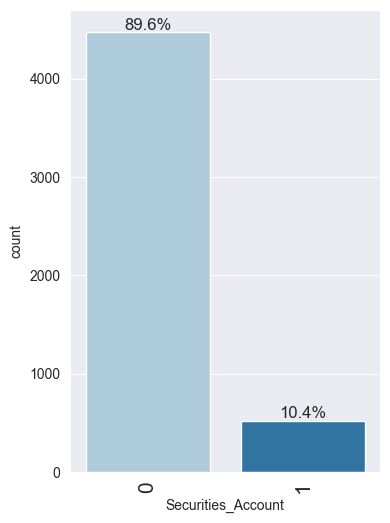

In [32]:
labeled_barplot(data, 'Securities_Account', True)

* 89.6% Do not have Security Account
* 10.4% Have security account with the bank

#### Observation on CD_Account

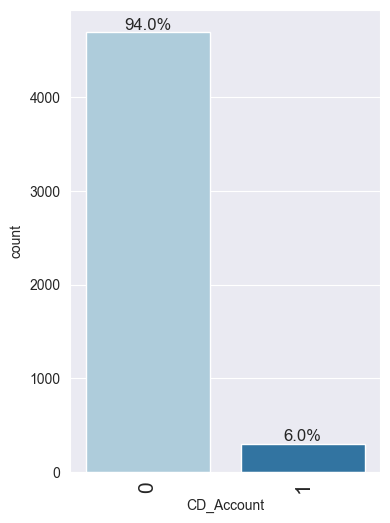

In [33]:
labeled_barplot(data, 'CD_Account', True)

* 94% Dom not have CD_Account
* 6% Have CD_Account

#### Observation on Online

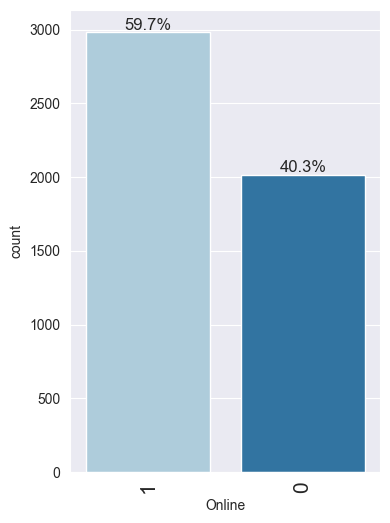

In [34]:
labeled_barplot(data, 'Online', True)

59.7% Use online banking
40.3% Do not use online banking

#### Observation on CreditCard

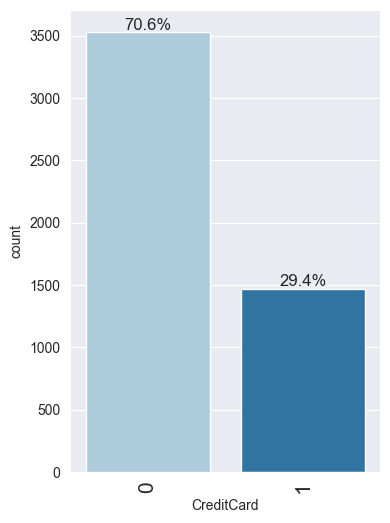

In [35]:
labeled_barplot(data, 'CreditCard', True)

* 70.6% Do not have credit card
* 29.4% Do use credit card

## Bivariate Analysis

In [36]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [37]:
def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

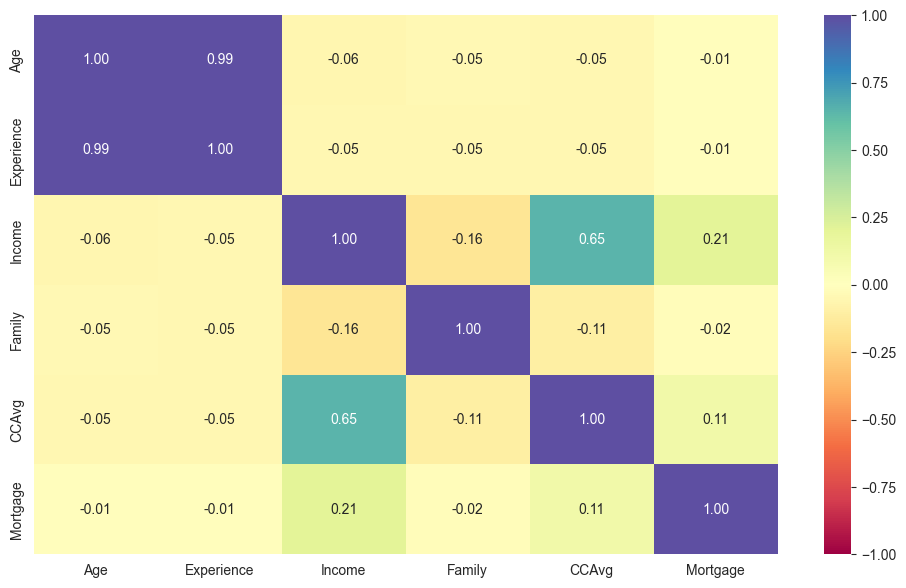

In [38]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are a couple of strong correlation here
* Experience and Age are strongly correlated as expected
* CCAvg and income is also strongly correlated

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


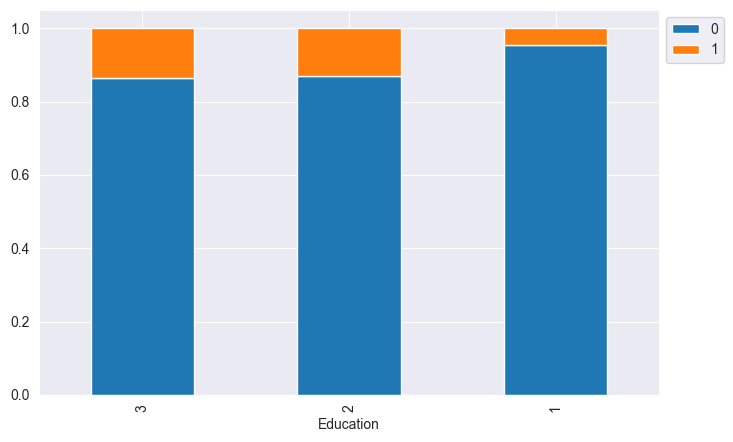

In [39]:
stacked_barplot(data, "Education", "Personal_Loan")

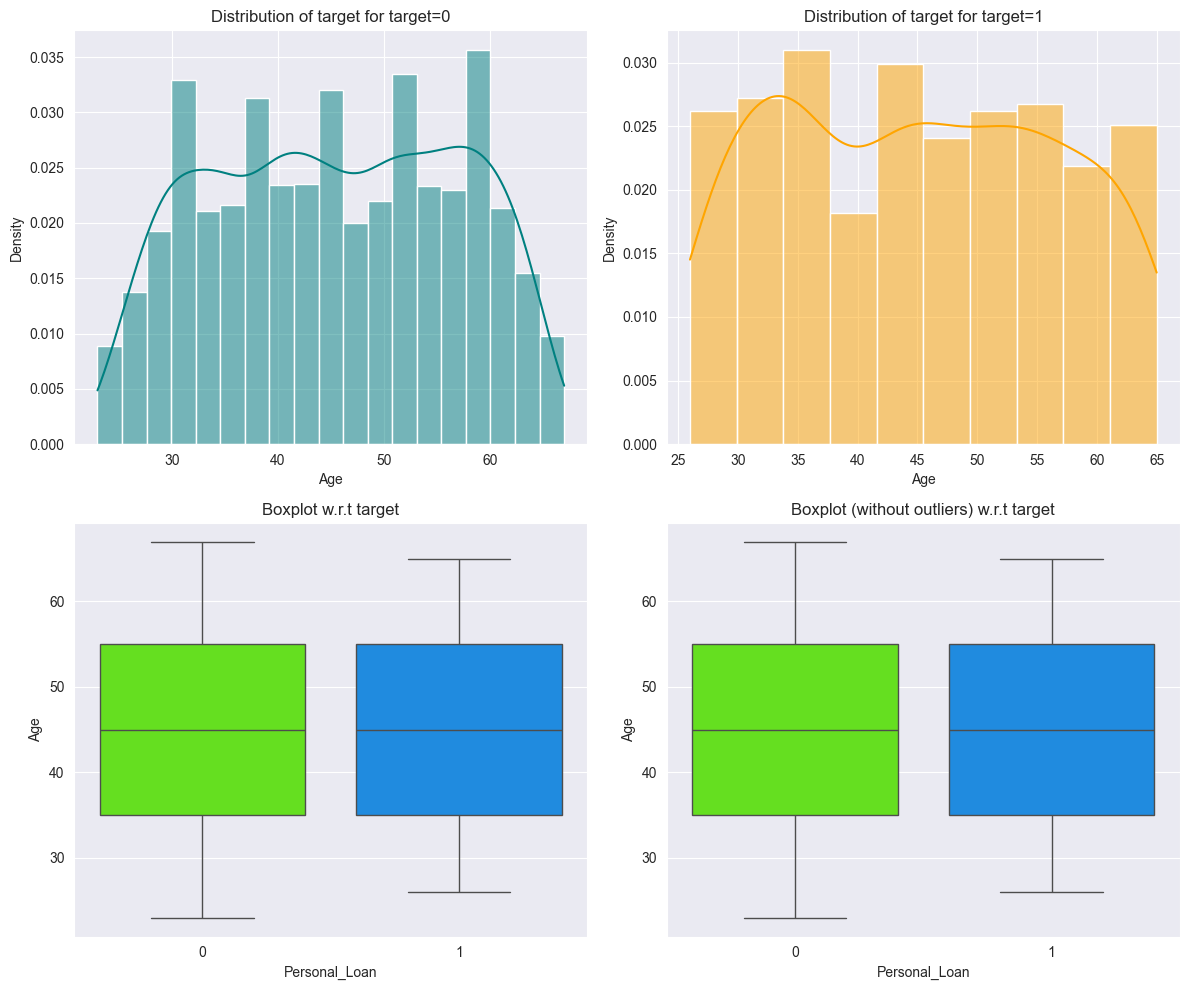

In [40]:
distribution_plot_wrt_target(data, 'Age', 'Personal_Loan')

* Median Age is 45
* The no outliers present

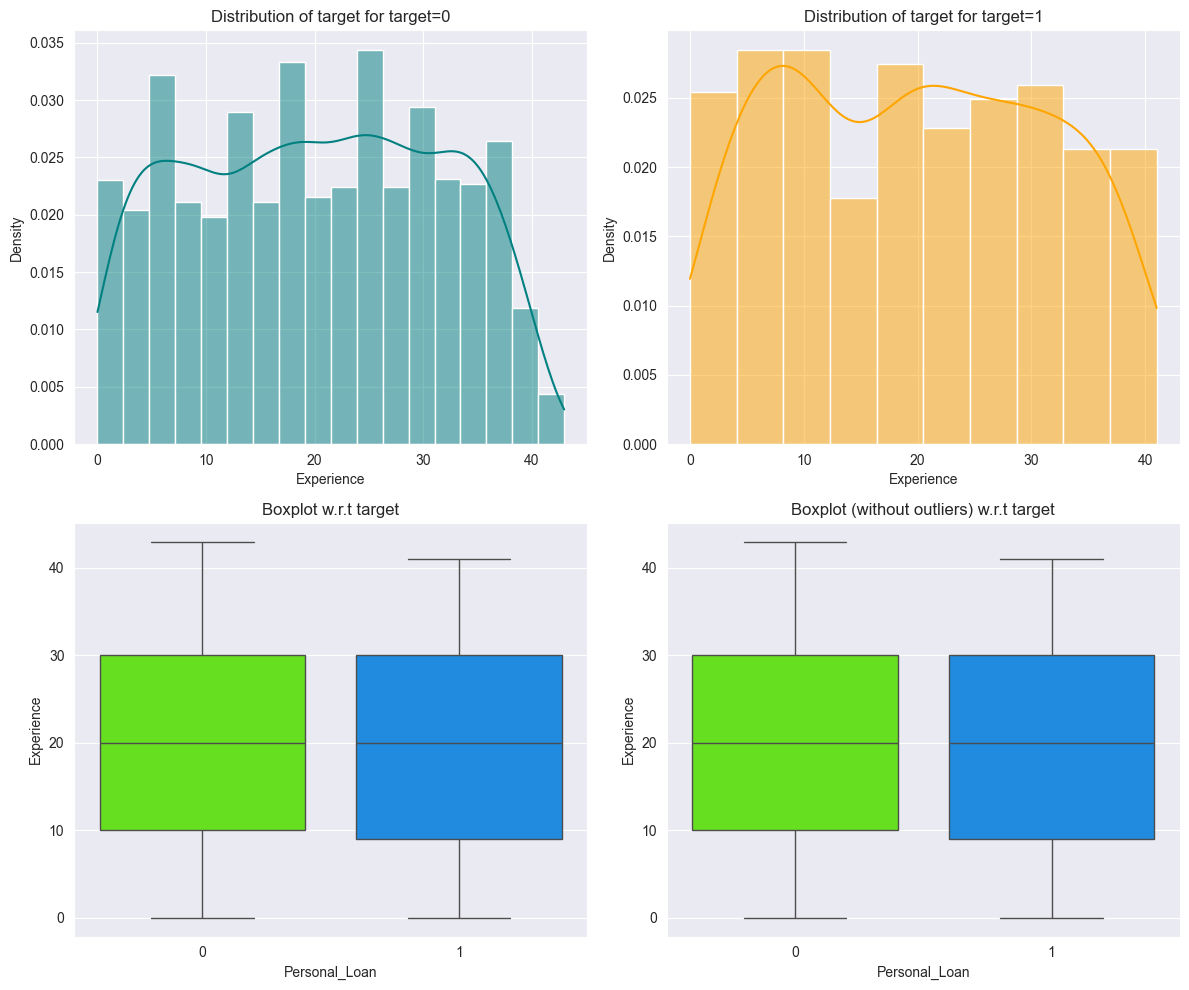

In [41]:
distribution_plot_wrt_target(data, 'Experience', 'Personal_Loan')

* Median years of Experience is 20
* There are no outliers present
* The data is almost evenly distributed

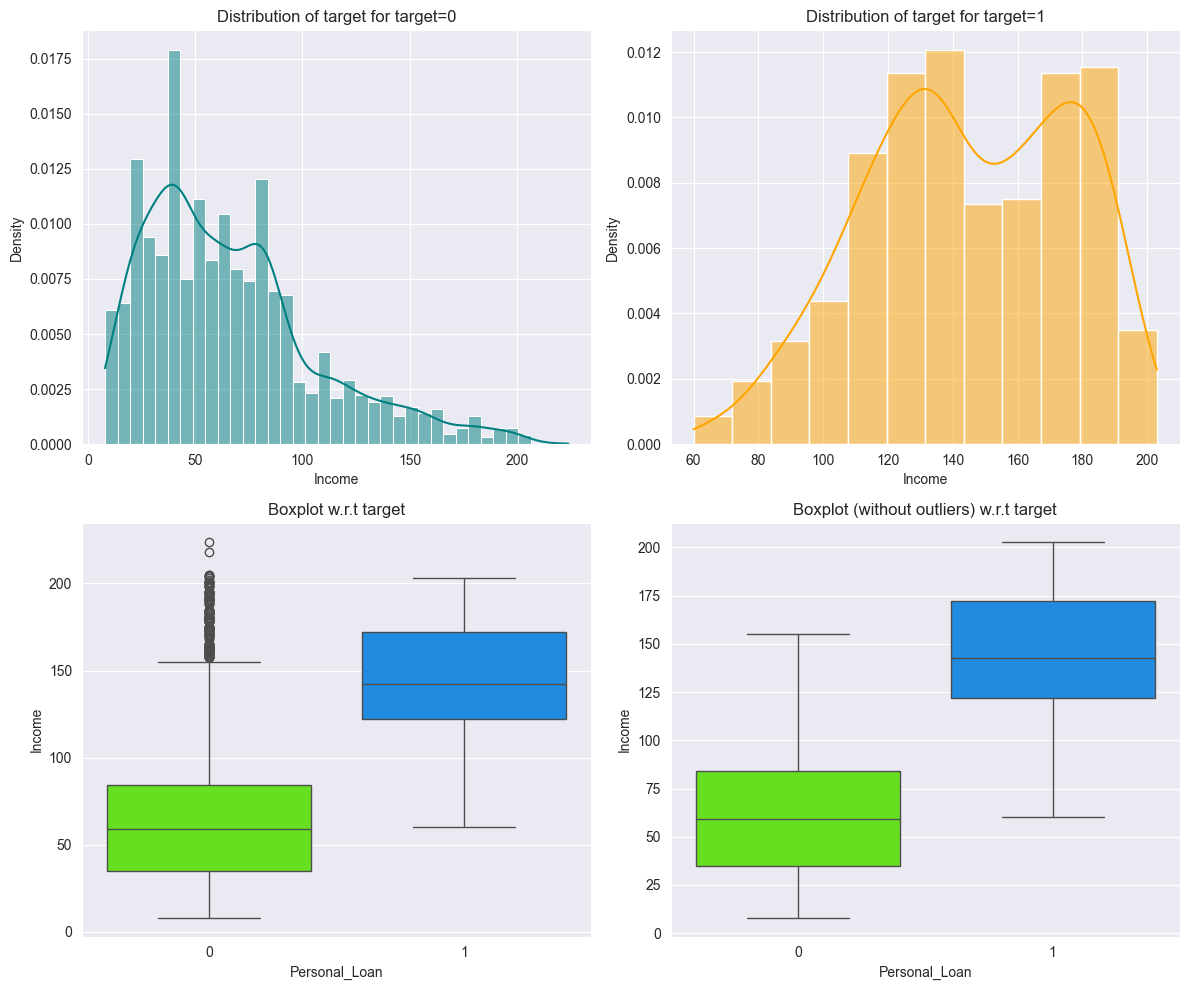

In [42]:
distribution_plot_wrt_target(data, 'Income', 'Personal_Loan')

* Customers with no Personal Loan have a right skewed chart
* Customers with no Personal Loan have a median income of 55 and we have outliers present on the upper quartile
* Customers with Personal Loan have a left skewed chart
* Customers with Personal Loan have a median income of 140 and we have no outliers present

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


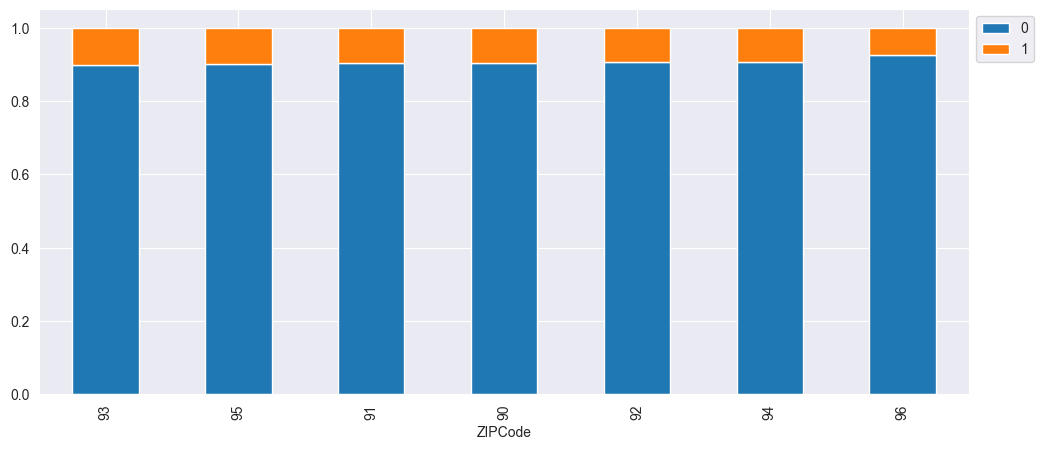

In [43]:
stacked_barplot(data, 'ZIPCode', 'Personal_Loan')

* Majority of Customers are from the `94` `ZIPCode` region
* The `94` `ZIPCode` region also has the highest numbers of customers with and without personal loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


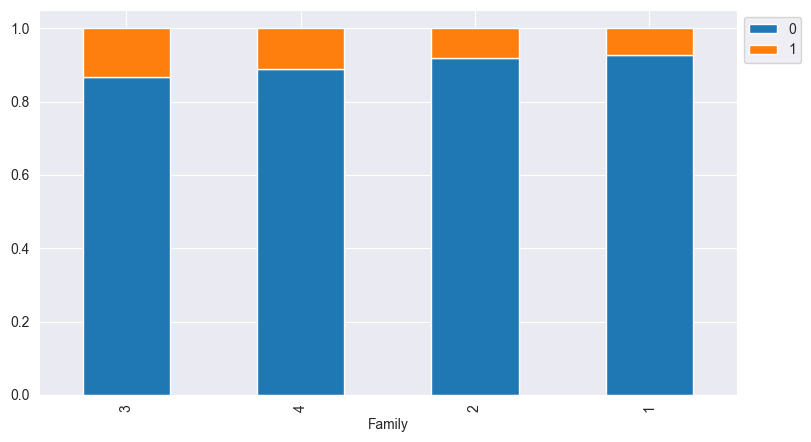

In [44]:
stacked_barplot(data, 'Family', 'Personal_Loan')

* Family of 1 has the highest amount of people without loans
* Family of 3 has the highest amount of people with loans

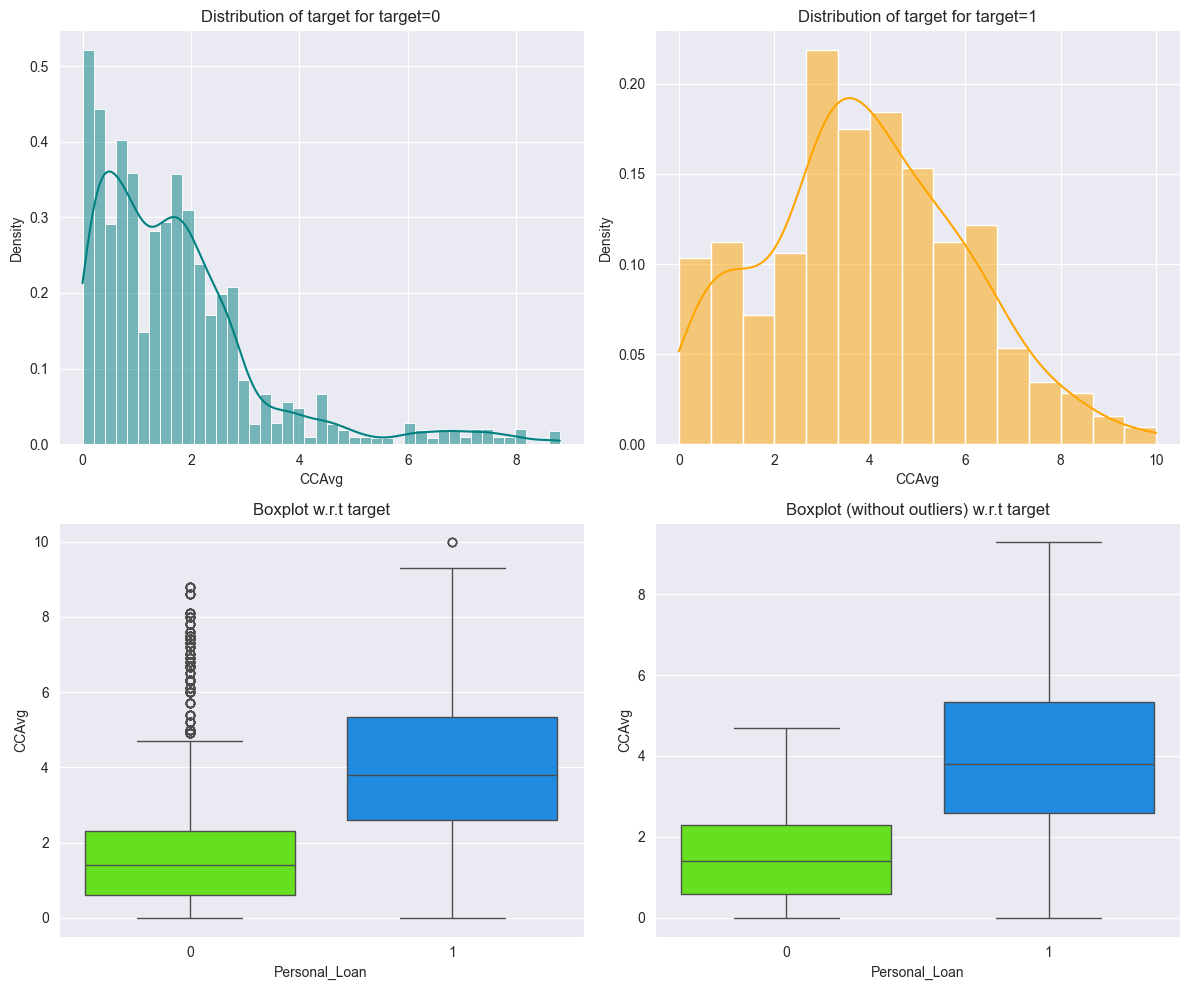

In [45]:
distribution_plot_wrt_target(data, 'CCAvg', 'Personal_Loan')

* Distribution is skewed to the right
* Outliers are present 

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


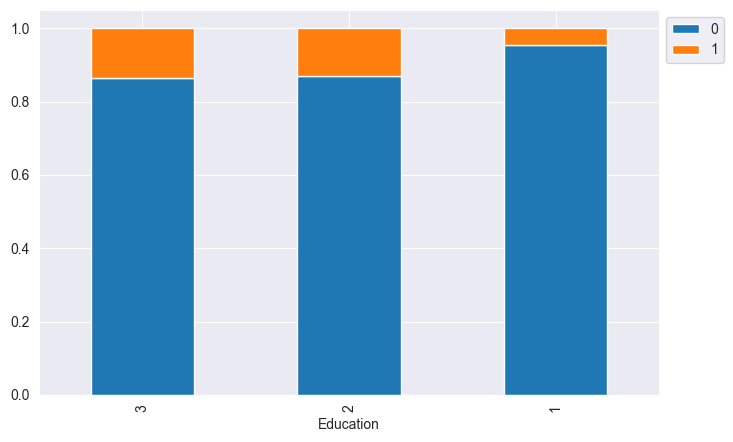

In [46]:
stacked_barplot(data, 'Education', 'Personal_Loan')

* Advanced/Professional have the highest count for personal loan given, which is expected since they are able ton pay back 
* UnderGrads has the highest number for no Personal Loan and lowest count for personal loans given

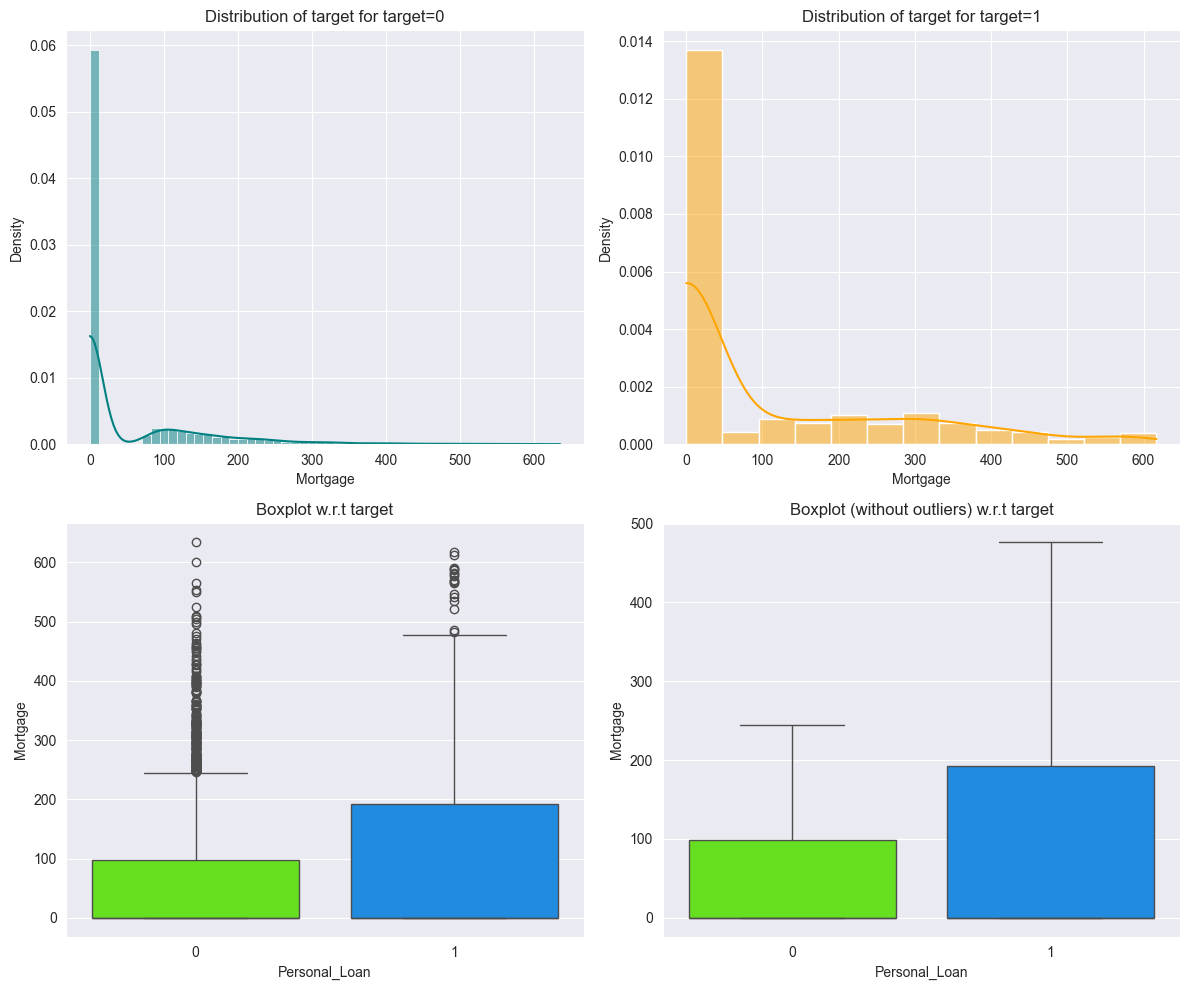

In [47]:
distribution_plot_wrt_target(data, 'Mortgage', 'Personal_Loan')

* Distribution is skewed to the right
* Outliers are present

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


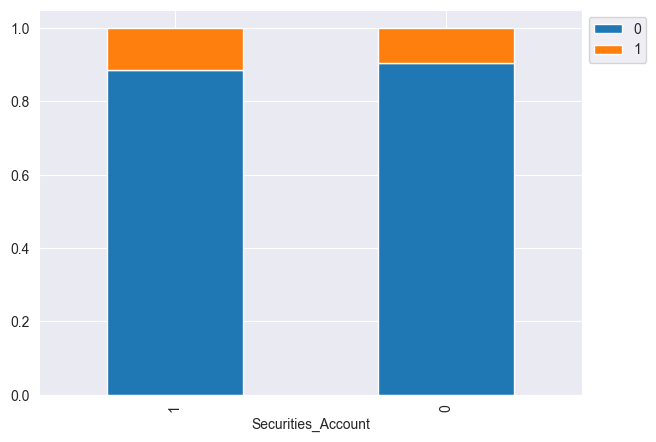

In [48]:
stacked_barplot(data, 'Securities_Account', 'Personal_Loan')

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


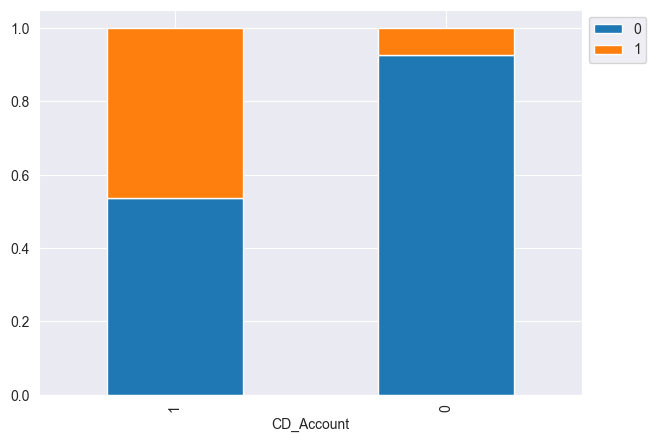

In [49]:
stacked_barplot(data, 'CD_Account', 'Personal_Loan')

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


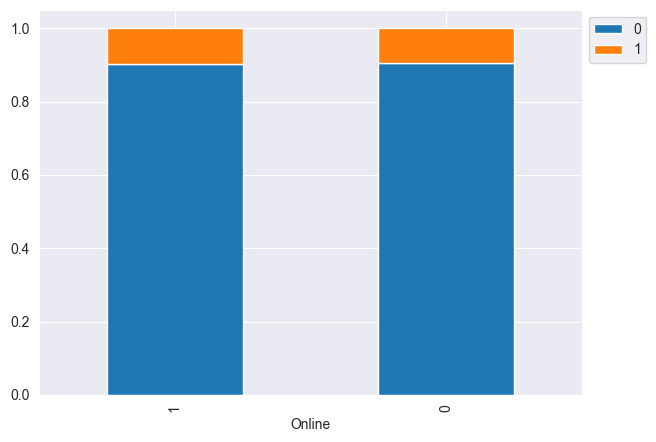

In [50]:
stacked_barplot(data, 'Online', 'Personal_Loan')

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


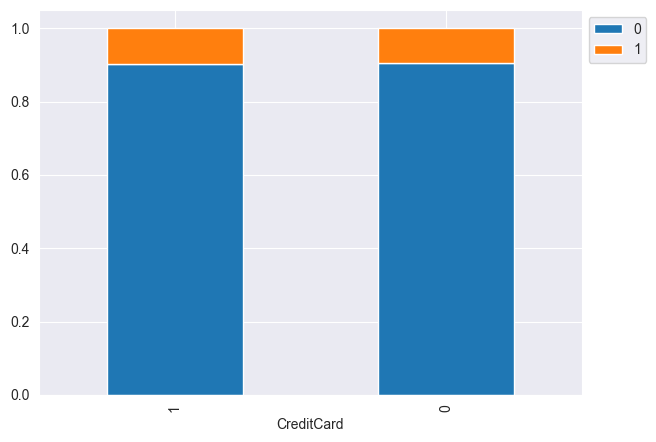

In [51]:
stacked_barplot(data, 'CreditCard', 'Personal_Loan')

### Outlier Detection

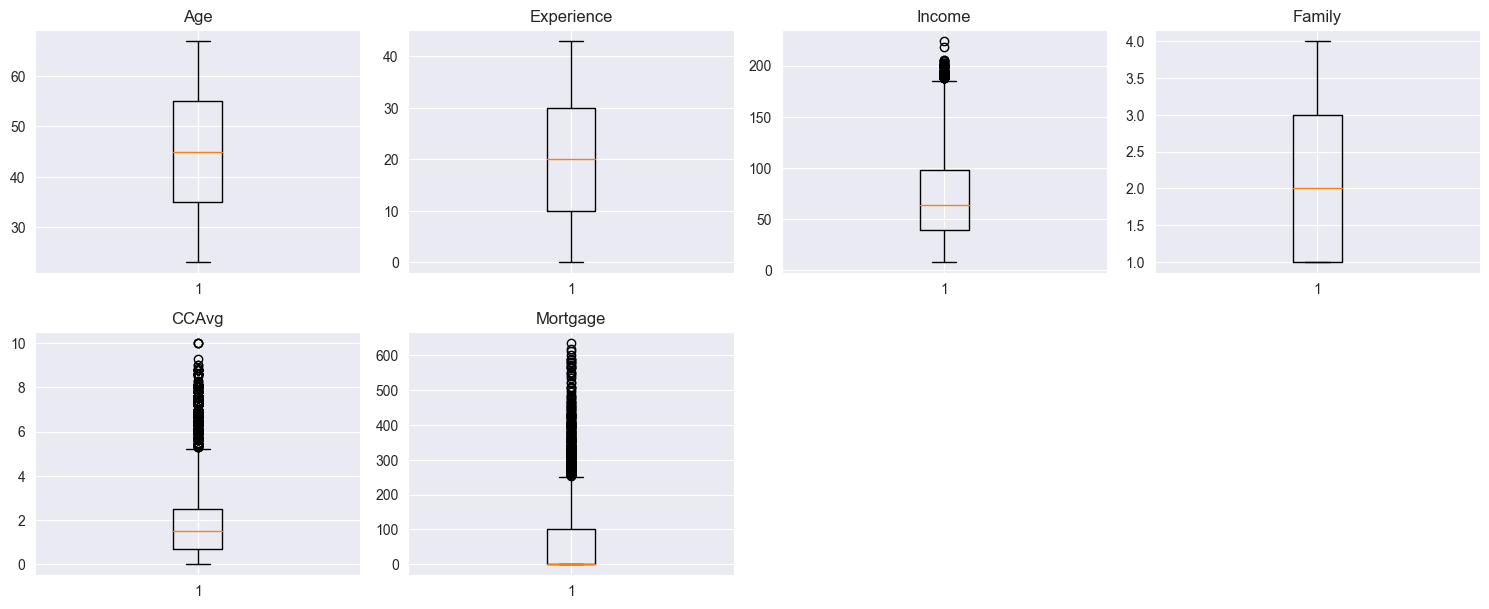

In [52]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [53]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age          0.00000
Experience   0.00000
Income       1.92000
Family       0.00000
CCAvg        6.48000
Mortgage     5.82000
dtype: float64

* Outliers are detected in CCAvg, Mortgage and Income
* This outliers will not be treated because the are proper values

### Data Preparation for Modeling

In [54]:
X = data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']

#### Encoding Categorical Data

In [55]:
from sklearn.preprocessing import OneHotEncoder

categorical_col = ['Education', 'ZIPCode']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X[categorical_col])

encoded_cols = list(encoder.get_feature_names_out(categorical_col))
X[encoded_cols] = encoder.transform(X[categorical_col])
X = X.drop(['ZIPCode', 'Education'], axis=1)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3,ZIPCode_90,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96
0,25,1,49,4,1.60000,0,1,0,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,45,19,34,3,1.50000,0,1,0,0,0,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,39,15,11,1,1.00000,0,0,0,0,0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,35,9,100,1,2.70000,0,0,0,0,0,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,35,8,45,4,1.00000,0,0,0,0,1,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [57]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Testing set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 20)
Shape of Testing set :  (1500, 20)
Percentage of classes in training set:
0   0.90543
1   0.09457
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.90067
1   0.09933
Name: Personal_Loan, dtype: float64


* We have sen that around 90.5% belongs to the class of people without personal loan and 9.5% of class of people with personal loan in both training and test data set

### Model Building

### Decision Tree (Level 1, Without Weights)

In [58]:
model_0 = DecisionTreeClassifier(random_state=1)
model_0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

#### Model evaluation criterion

#### Possible wrong prediction includes

* Predicting a customer can pay back a loan, but in reality they can not pay back the loan (FP)
* Predicting a customer cannot pay back the loan, but in reality they can pay back the loan (FN)

#### Which case is more important
* Since we are focused on knowing who can buy personal loan, we need to maximize our recall and focus on the False Negatives
* Losing money is greater compared to losing an opportunity

#### How to reduce the losses
* The bank would want recall to be maximized, the greater the precision score the higher the chances of minimizing false Positives

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

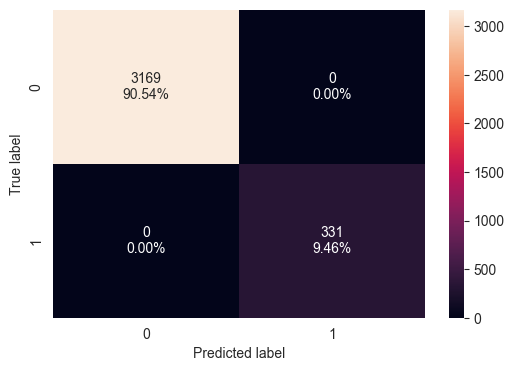

In [61]:
confusion_matrix_sklearn(model_0, X_train, y_train)

In [62]:
level_0_decision_tree_perf_train = model_performance_classification_sklearn(
    model_0, X_train, y_train
)
level_0_decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

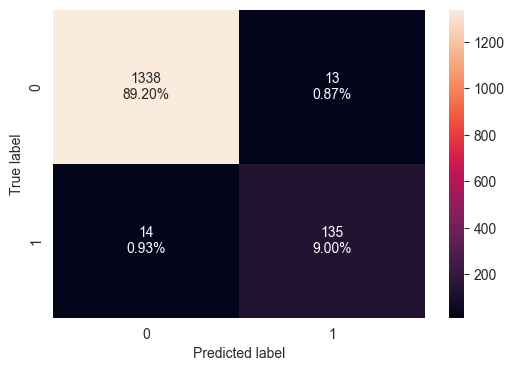

In [63]:
confusion_matrix_sklearn(model_0, X_test, y_test)

In [64]:
level_0_decision_tree_perf_test = model_performance_classification_sklearn(
    model_0, X_test, y_test
)
level_0_decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98200,0.90604,0.91216,0.90909


* We see some difference between the test recall and train data recall value
* We will try other methods to get better less overfitted models

#### Decision Tree (Level 2, Using Class Weights)

In [65]:
model_1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

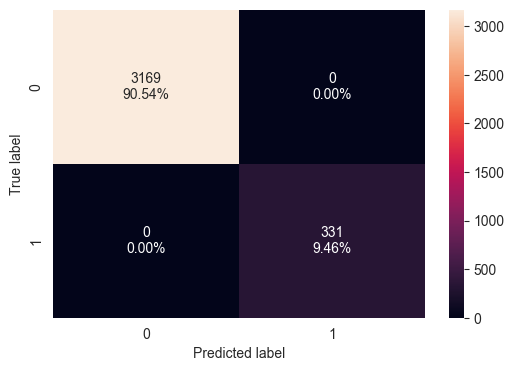

In [66]:
confusion_matrix_sklearn(model_1, X_train, y_train)

In [67]:
level_1_decision_tree_perf_train = model_performance_classification_sklearn(
    model_1, X_train, y_train
)
level_1_decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

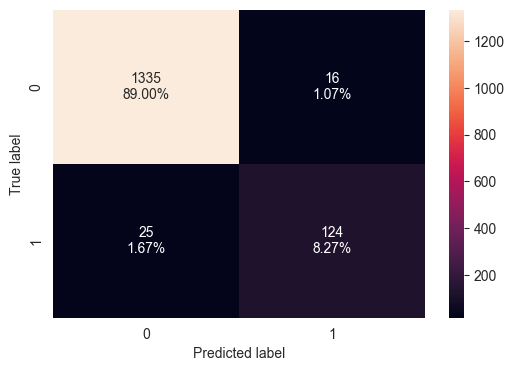

In [68]:
confusion_matrix_sklearn(model_1, X_test, y_test)

In [69]:
level_1_decision_tree_perf_test = model_performance_classification_sklearn(
    model_1, X_test, y_test
)
level_1_decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97267,0.83221,0.88571,0.85813


* We see a huge difference between the test data recall and train data recall using weights
* We will try other methods to get better less overfitted models

#### Decision Tree (Level 3, Pre-pruning)

In [89]:
# Choose the type of classifier
model_2 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(model_2, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

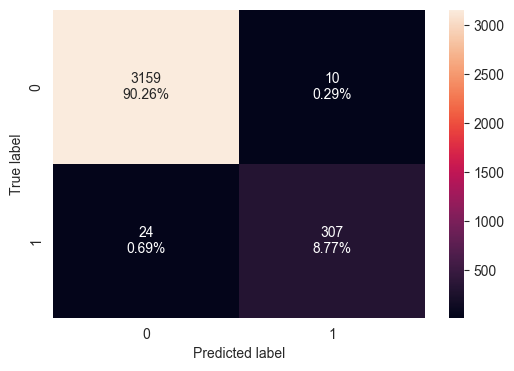

In [90]:
confusion_matrix_sklearn(model_2, X_train, y_train)

In [91]:
# Training Data Metrics
level_2_decision_tree_perf_train = model_performance_classification_sklearn(
    model_2, X_train, y_train
)
level_2_decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99029,0.92749,0.96845,0.94753


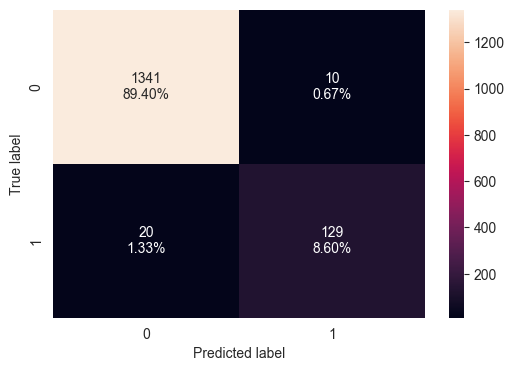

In [92]:
confusion_matrix_sklearn(model_2, X_test, y_test)

In [93]:
# Test Data Metrics
level_2_decision_tree_perf_test = model_performance_classification_sklearn(
    model_2, X_test, y_test
)
level_2_decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98000,0.86577,0.92806,0.89583


In [94]:
feature_names = list(X_train.columns)

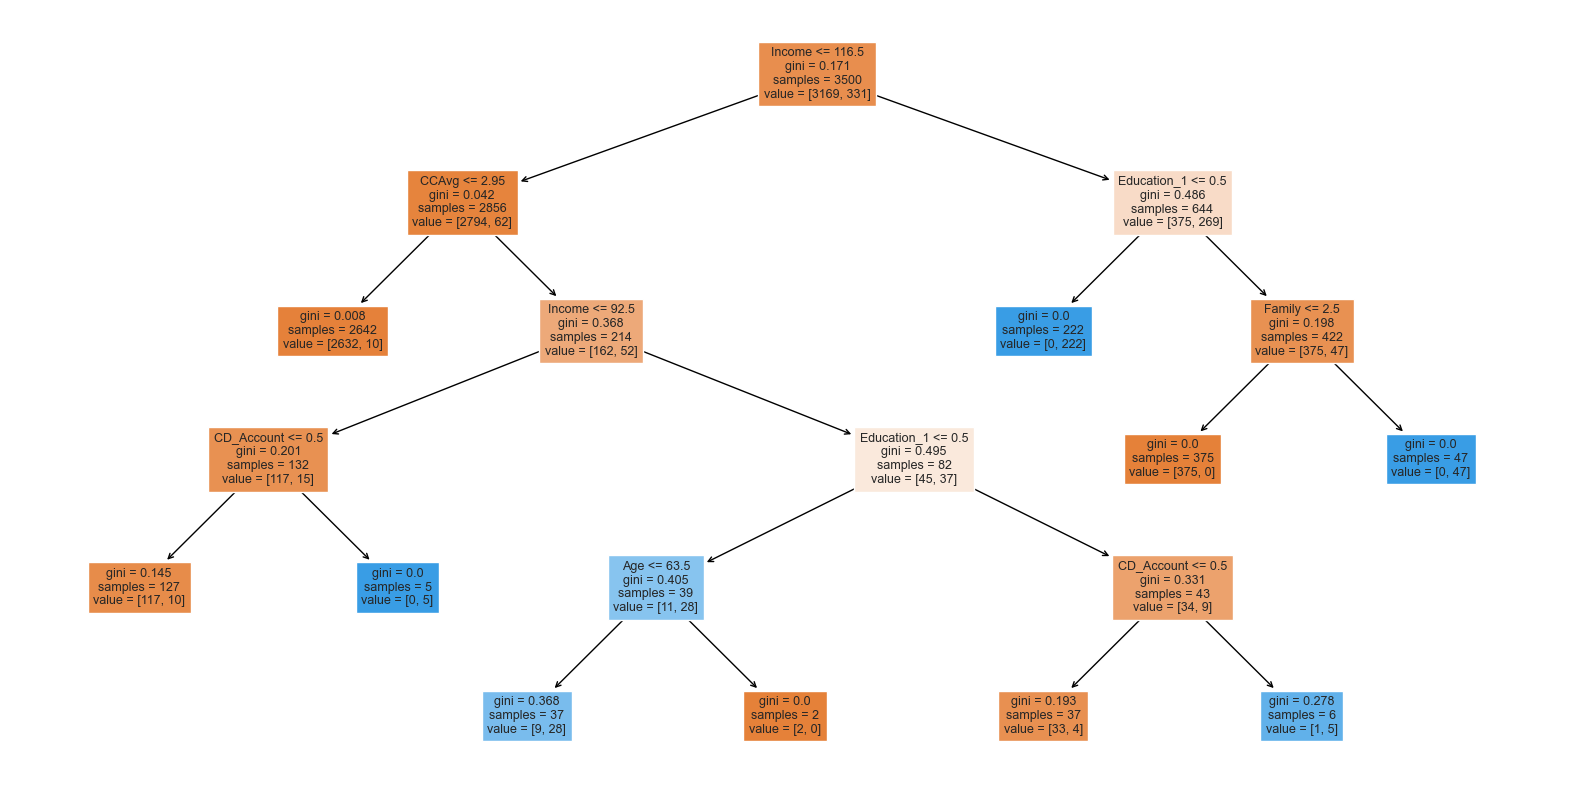

In [95]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [96]:
print(tree.export_text(model_2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_1 <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_1 >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_1 <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_1 >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] clas

**Observations from the pre-pruned tree:**

In [97]:
importances = model_2.feature_importances_
importances

array([0.00403484, 0.        , 0.3273871 , 0.15508277, 0.04206086,
       0.        , 0.        , 0.02524312, 0.        , 0.        ,
       0.44619131, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

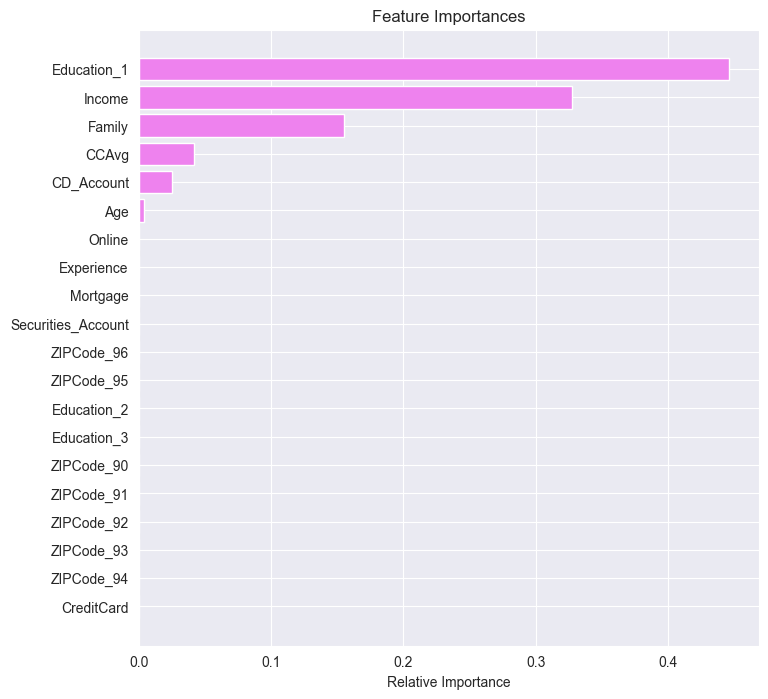

In [99]:
# importance of features in the tree building

importances = model_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education_1, Income, Family, CCAvg, CD_Account are the most important variables
* From the decision tree we can say that if  Income is less than or equal to 116.5 and CCAvg is less than or equal to 2.95, this customer is most likely to buy a loan

### Decision Tree (Level 4, Post Pruning: Cost Complexity Pruning)

In [100]:
# Get ccp_alphas and impurities
clf = DecisionTreeClassifier(random_state=1) # {0: 0.15, 1: 0.85}
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00019,0.00111
2,0.00021,0.00154
3,0.00024,0.00275
4,0.00027,0.00382
5,0.00036,0.00490
6,0.00038,0.00528
7,0.00038,0.00566
8,0.00038,0.00604
9,0.00038,0.00642


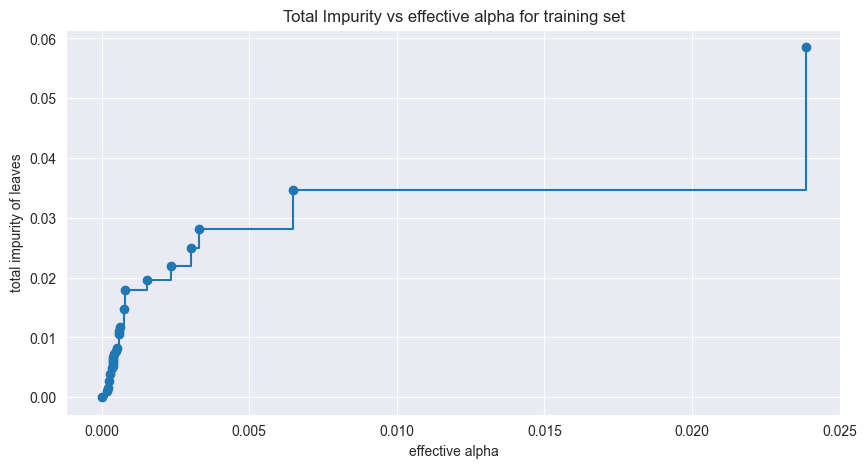

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.056364969335601575


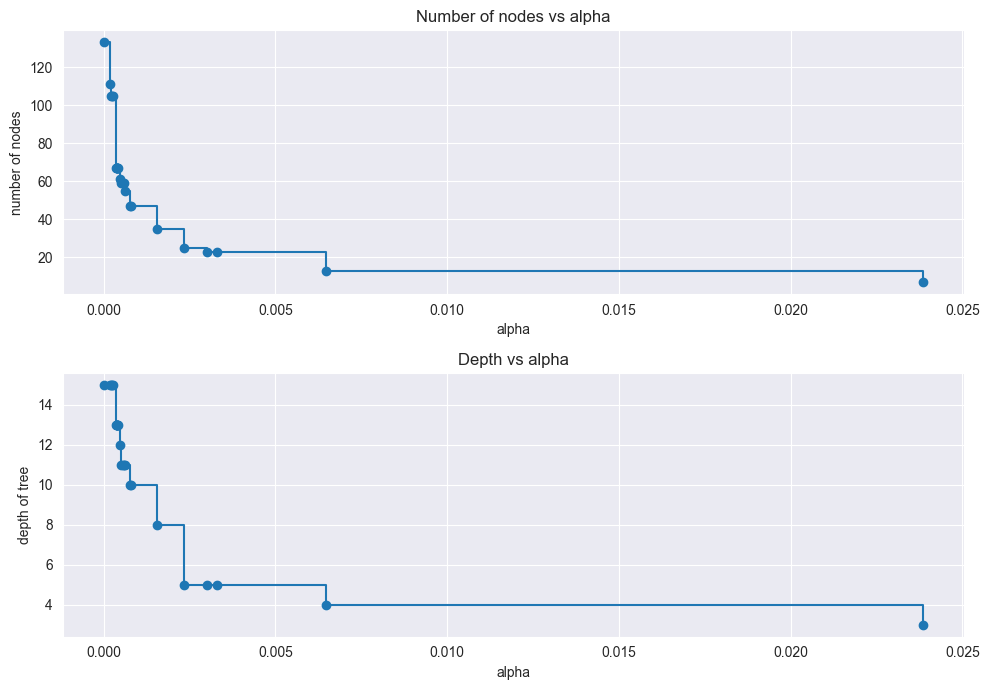

In [103]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [104]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [105]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [106]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

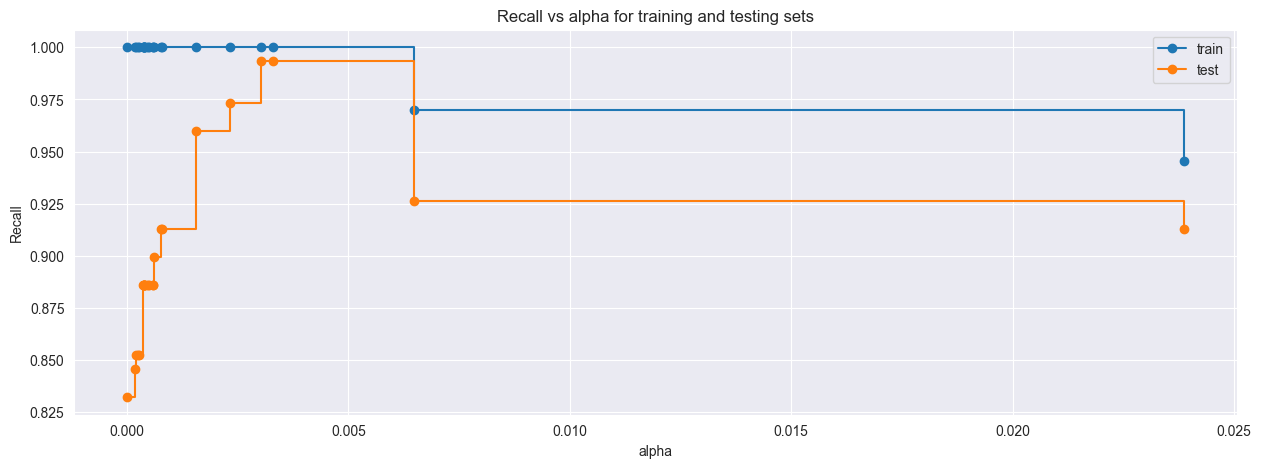

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
index_best_model = np.argmax(recall_test)
model_3 = clfs[index_best_model]
print(model_3)

DecisionTreeClassifier(ccp_alpha=0.003023521760901227, class_weight='balanced',
                       random_state=1)


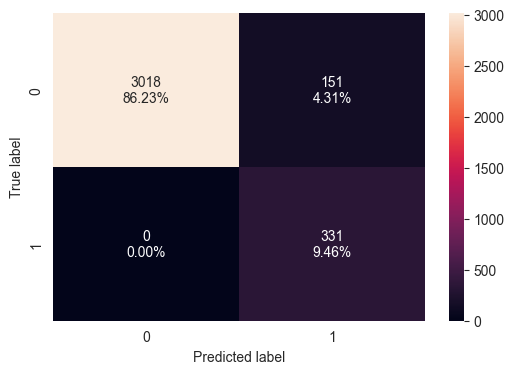

In [110]:
confusion_matrix_sklearn(model_3, X_train, y_train)

In [118]:
# Training Data Metrics
level_3_decision_tree_perf_train = model_performance_classification_sklearn(
    model_3, X_train, y_train
)
level_3_decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.95686,1.00000,0.68672,0.81427


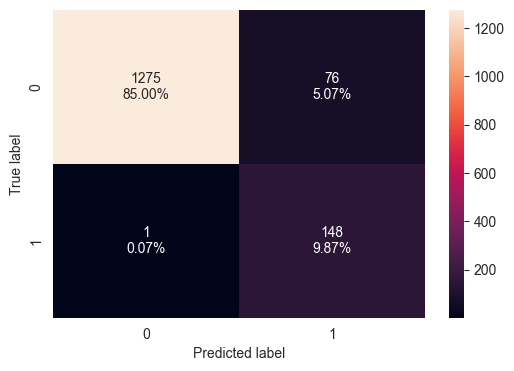

In [112]:
confusion_matrix_sklearn(model_3, X_test, y_test)

In [117]:
# Test Data Metrics
level_3_decision_tree_perf_test = model_performance_classification_sklearn(
    model_3, X_test, y_test
)
level_3_decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.94867,0.99329,0.66071,0.79357


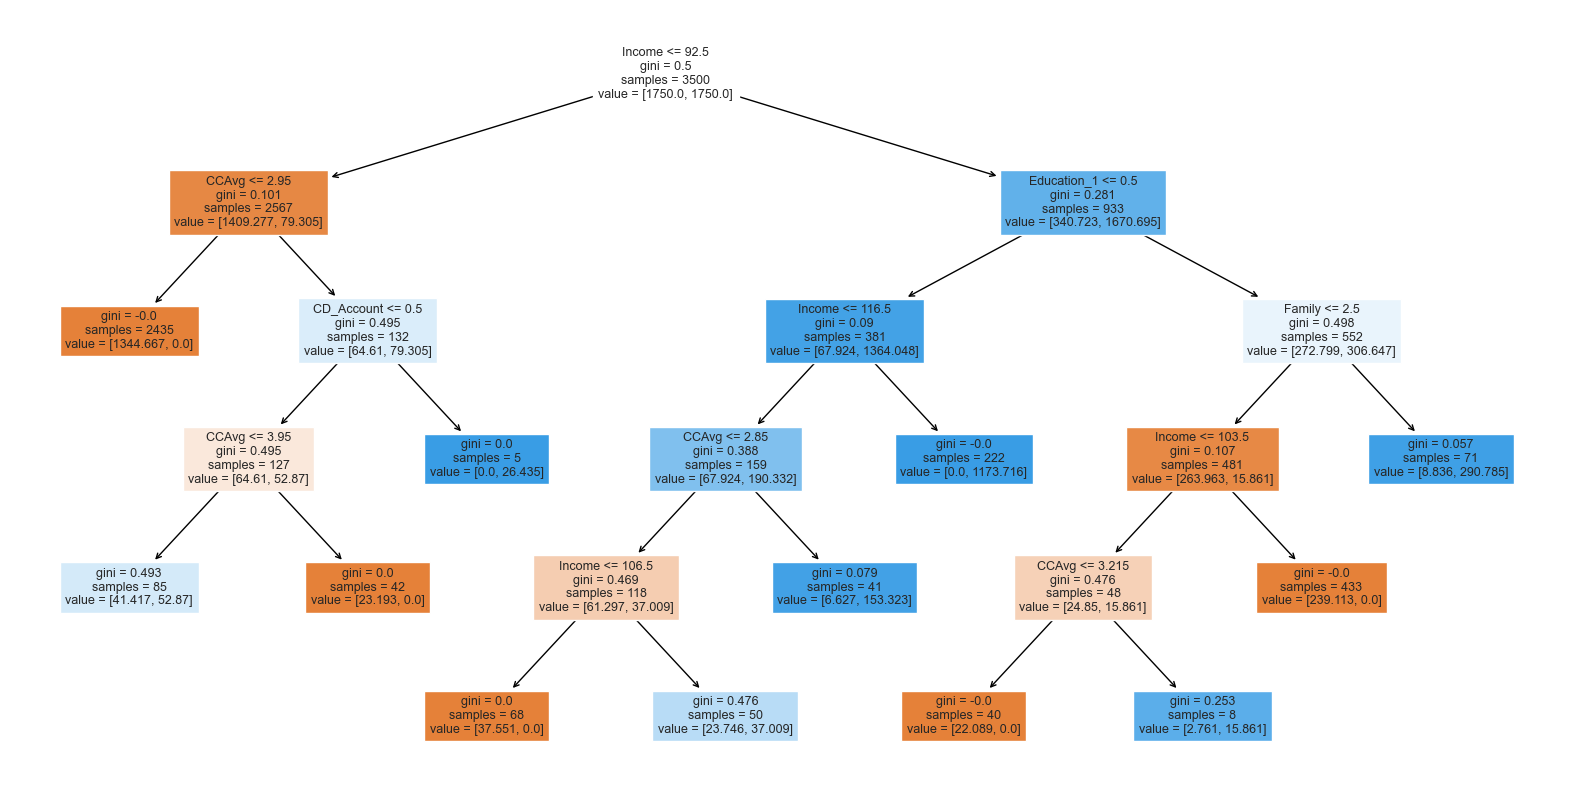

In [114]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model_3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [115]:
print(tree.export_text(model_3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education_1 <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [37.55, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [23.75, 37.01] class: 1
|   |   |   |--- CCAvg >  2.85
|   |   |   |   |--- weights: [6.63, 153.32] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 1173.72] class: 1
|   |--- Education_1 >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   | 

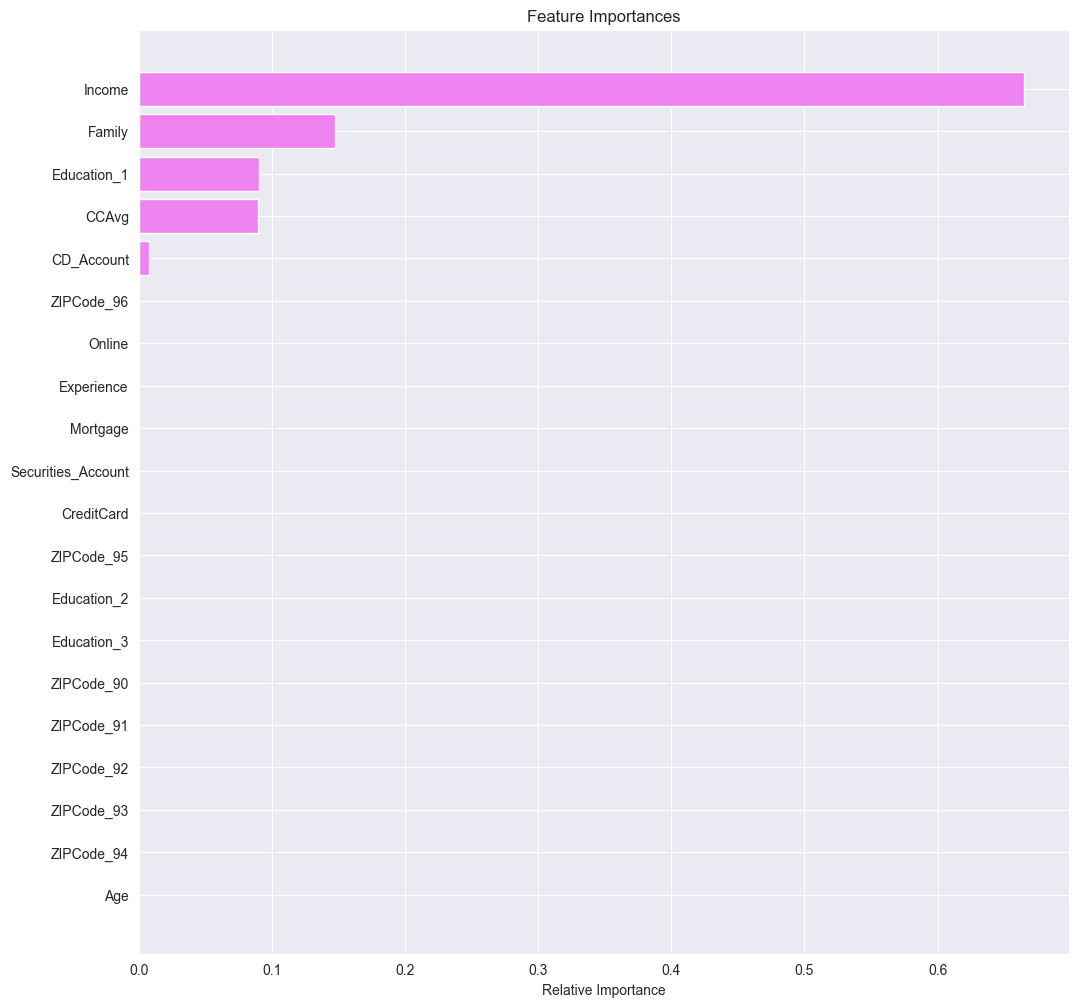

In [116]:
importances = model_3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family, Education_1, CCAvg, CD_Account are the most important variables
* From the decision tree we can say that if  Income is less than or equal to 92.5 and CCAvg is less than or equal to 2.95, this customer is most likely to buy a loan

## Comparison of Models and Final Model Selection

In [119]:
models_train_comp_df = pd.concat(
    [
        level_0_decision_tree_perf_train.T,
        level_1_decision_tree_perf_train.T,
        level_2_decision_tree_perf_train.T,
        level_3_decision_tree_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.99029,0.95686
Recall,1.00000,1.00000,0.92749,1.00000
Precision,1.00000,1.00000,0.96845,0.68672
F1,1.00000,1.00000,0.94753,0.81427


In [120]:
models_test_comp_df = pd.concat(
    [
        level_0_decision_tree_perf_test.T,
        level_1_decision_tree_perf_test.T,
        level_2_decision_tree_perf_test.T,
        level_3_decision_tree_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.98200,0.97267,0.98000,0.94867
Recall,0.90604,0.83221,0.86577,0.99329
Precision,0.91216,0.88571,0.92806,0.66071
F1,0.90909,0.85813,0.89583,0.79357


* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

## Actionable Insights and Business Recommendations


* The model built can be used to predict customers who are likely to buy loans
* Income, Education and CCAvg are the 3 most important variables in predict whether a customer will buy loan

* What recommedations would you suggest to the bank?

* The bank should pay attention to people with average income and average CCAvg 
* Undergraduates are the most likely to want to buy a loan